In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso,LassoCV
from sklearn import metrics
from sklearn.ensemble import (AdaBoostRegressor, GradientBoostingRegressor,
                              GradientBoostingRegressor,
                              RandomForestRegressor,
                              VotingRegressor)
from sklearn.linear_model import (ElasticNet, ElasticNetCV, Lasso, LassoCV,
                                  LinearRegression, LogisticRegression, Ridge)
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix, r2_score, roc_auc_score,
                             roc_curve)
from sklearn.model_selection import (GridSearchCV, KFold, RandomizedSearchCV,
                                     cross_val_score, train_test_split)
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn import tree
from sklearn import metrics
from sklearn.tree import export_graphviz
import pydotplus
import imblearn
import lightgbm
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import os
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve,classification_report,accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from sklearn.ensemble import RandomForestClassifier

## Section A

#### 1a.

In [2]:
df=pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

1. Number of rows are 1338
2. Number of columns are 7

In [5]:
df.dtypes[df.dtypes!='object']

age           int64
bmi         float64
children      int64
charges     float64
dtype: object

In [6]:
df.dtypes[df.dtypes=='object']

sex       object
smoker    object
region    object
dtype: object

1. There are 4 continuous and 3 categorical columns present in the dataframe.

### 1. b

In [7]:
df[df.dtypes[df.dtypes!='object'].index].describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### 1. c

In [8]:
for col in list(df.dtypes[df.dtypes=='object'].index):
    print(df[col].value_counts())
    print('\n')
    print(df[col].value_counts(normalize=True))
    print('\n')
    print('Unique values: ',df[col].unique())
    print('\n')
    print('No of unique values: ',df[col].nunique())
    print('\n')

male      676
female    662
Name: sex, dtype: int64


male      0.505232
female    0.494768
Name: sex, dtype: float64


Unique values:  ['female' 'male']


No of unique values:  2


no     1064
yes     274
Name: smoker, dtype: int64


no     0.795217
yes    0.204783
Name: smoker, dtype: float64


Unique values:  ['yes' 'no']


No of unique values:  2


southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64


southeast    0.272048
northwest    0.242900
southwest    0.242900
northeast    0.242152
Name: region, dtype: float64


Unique values:  ['southwest' 'southeast' 'northwest' 'northeast']


No of unique values:  4




sex
male      676
female    662
Name: sex, dtype: int64


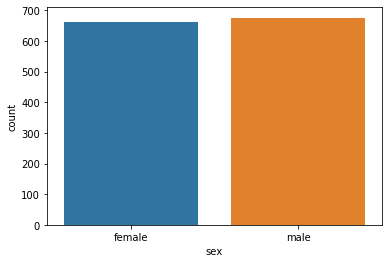

smoker
no     1064
yes     274
Name: smoker, dtype: int64


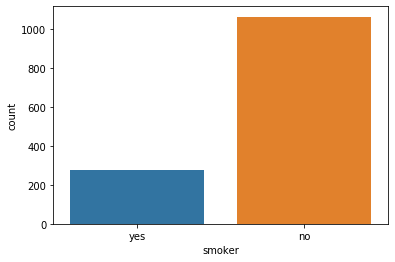

region
southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64


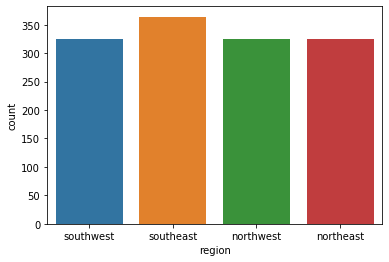

In [9]:
lst=['sex','smoker','region']
for col in lst:
    print(col)
    print(df[col].value_counts())
    sns.countplot(df[col])
    plt.show()

### 1.d

In [10]:
df.isnull().sum()[df.isnull().sum()!=0]

Series([], dtype: int64)

There is no any null values in the dataframe.

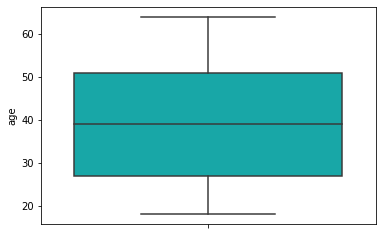

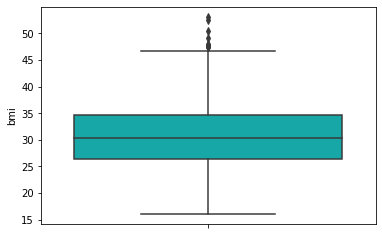

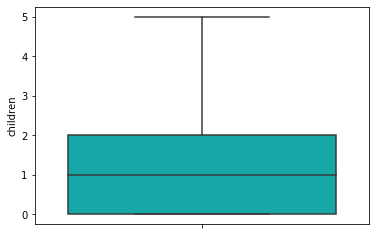

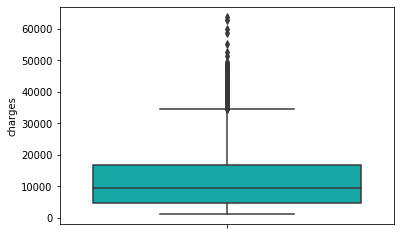

In [11]:
cols=list(df.dtypes[df.dtypes!='object'].index)
for i in cols:
    sns.boxplot(y=df[i],color='c')
    plt.show()

1. BMI got outliers.

## Section B

### 2.a

In [12]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [13]:
for i in cols:
    print(i,':',df[df[i]==0].shape[0])

age : 0
bmi : 0
children : 574
charges : 0


Number of childrens got zeros which is not an improbable value.

sex


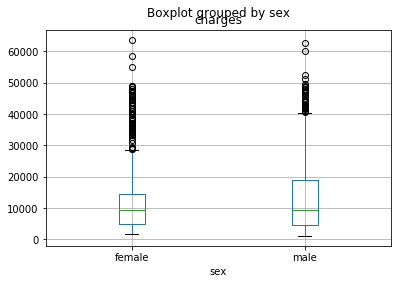

smoker


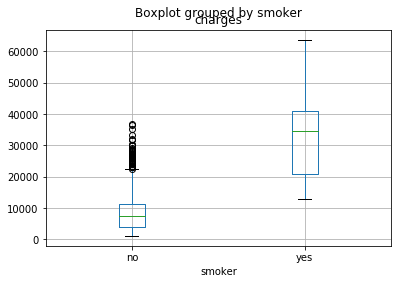

region


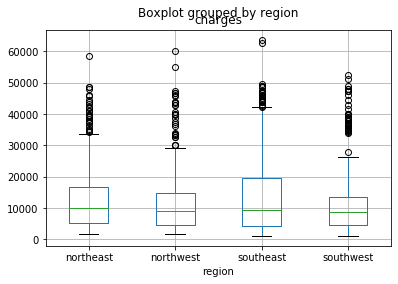

In [14]:
lst=df.dtypes[df.dtypes=='object'].index
for col in lst:
    print(col)
    df.boxplot(column='charges',by=col)
    plt.show()

Since we machine algorithms don't understand the string data, we have to do label encoding of the object columns based on the above boxplot after seeing the median values for order preference.

In [15]:
lst

Index(['sex', 'smoker', 'region'], dtype='object')

In [16]:
df.sex.replace({'female':0,'male':1},inplace=True)
df.smoker.replace({'no':0,'yes':1},inplace=True)
df.region.replace({'southwest':0,'northwest':1,'southeast':2,'northeast':3},inplace=True)

Now we can plot the disributions and check

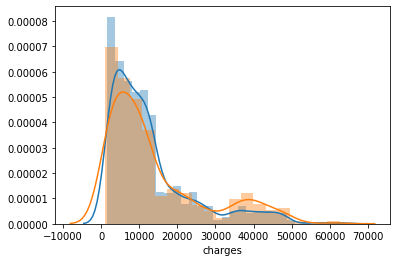

In [17]:
#sex:
sns.distplot(df[df['sex']==0]['charges'])
sns.distplot(df[df['sex']==1]['charges'])
plt.show()

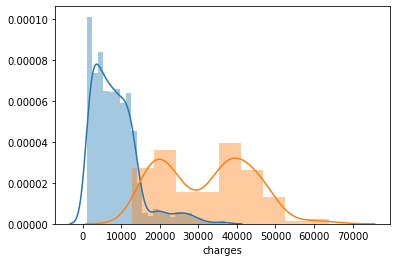

In [18]:
#smoker
sns.distplot(df[df['smoker']==0]['charges'])
sns.distplot(df[df['smoker']==1]['charges'])
plt.show()

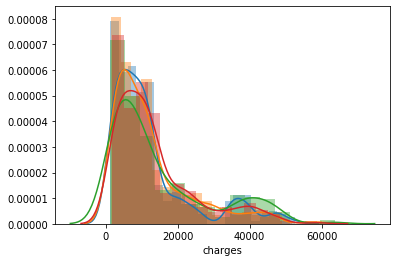

In [19]:
#region
sns.distplot(df[df['region']==0]['charges'])
sns.distplot(df[df['region']==1]['charges'])
sns.distplot(df[df['region']==2]['charges'])
sns.distplot(df[df['region']==3]['charges'])
plt.show()

age


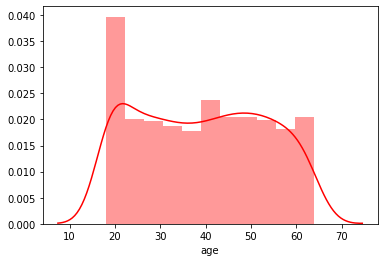

bmi


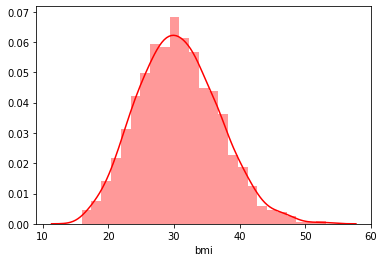

children


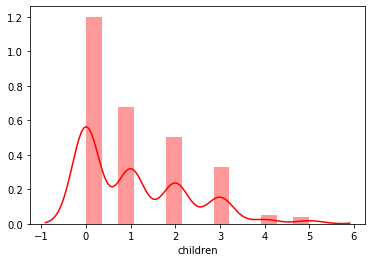

charges


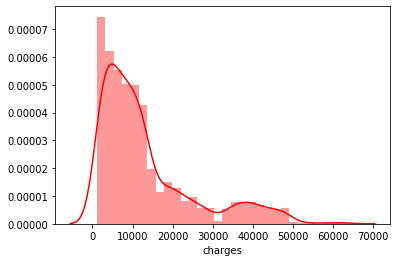

In [20]:
lst1=['age','bmi','children','charges']
for col in lst1:
    print(col)
    sns.distplot(df[col],color='r')
    plt.show()

In [21]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [22]:
df.sex.unique()

array([0, 1], dtype=int64)

In [23]:
df.region.unique()

array([0, 2, 1, 3], dtype=int64)

In [24]:
df.smoker.unique()

array([1, 0], dtype=int64)

In [25]:
df.skew()

age         0.055673
sex        -0.020951
bmi         0.284047
children    0.938380
smoker      1.464766
region     -0.035750
charges     1.515880
dtype: float64

In [26]:
df.loc[df['bmi']>24.9]

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,1,0,16884.9240
1,18,1,33.77,1,0,2,1725.5523
2,28,1,33.00,3,0,2,4449.4620
4,32,1,28.88,0,0,1,3866.8552
5,31,0,25.74,0,0,2,3756.6216
...,...,...,...,...,...,...,...
1333,50,1,30.97,3,0,1,10600.5483
1334,18,0,31.92,0,0,3,2205.9808
1335,18,0,36.85,0,0,2,1629.8335
1336,21,0,25.80,0,0,0,2007.9450


There are 1096 observations greater than 24.9 and hence we cannot just drop all of those.

To deal with the outliers we will use z score approach

In [27]:
d=st.zscore(df)
df=df[(abs(d)<3).all(axis=1)]

In [28]:
df.shape

(1309, 7)

Thus, we have eliminated around 3% of the outliers from the data.

### 2.b

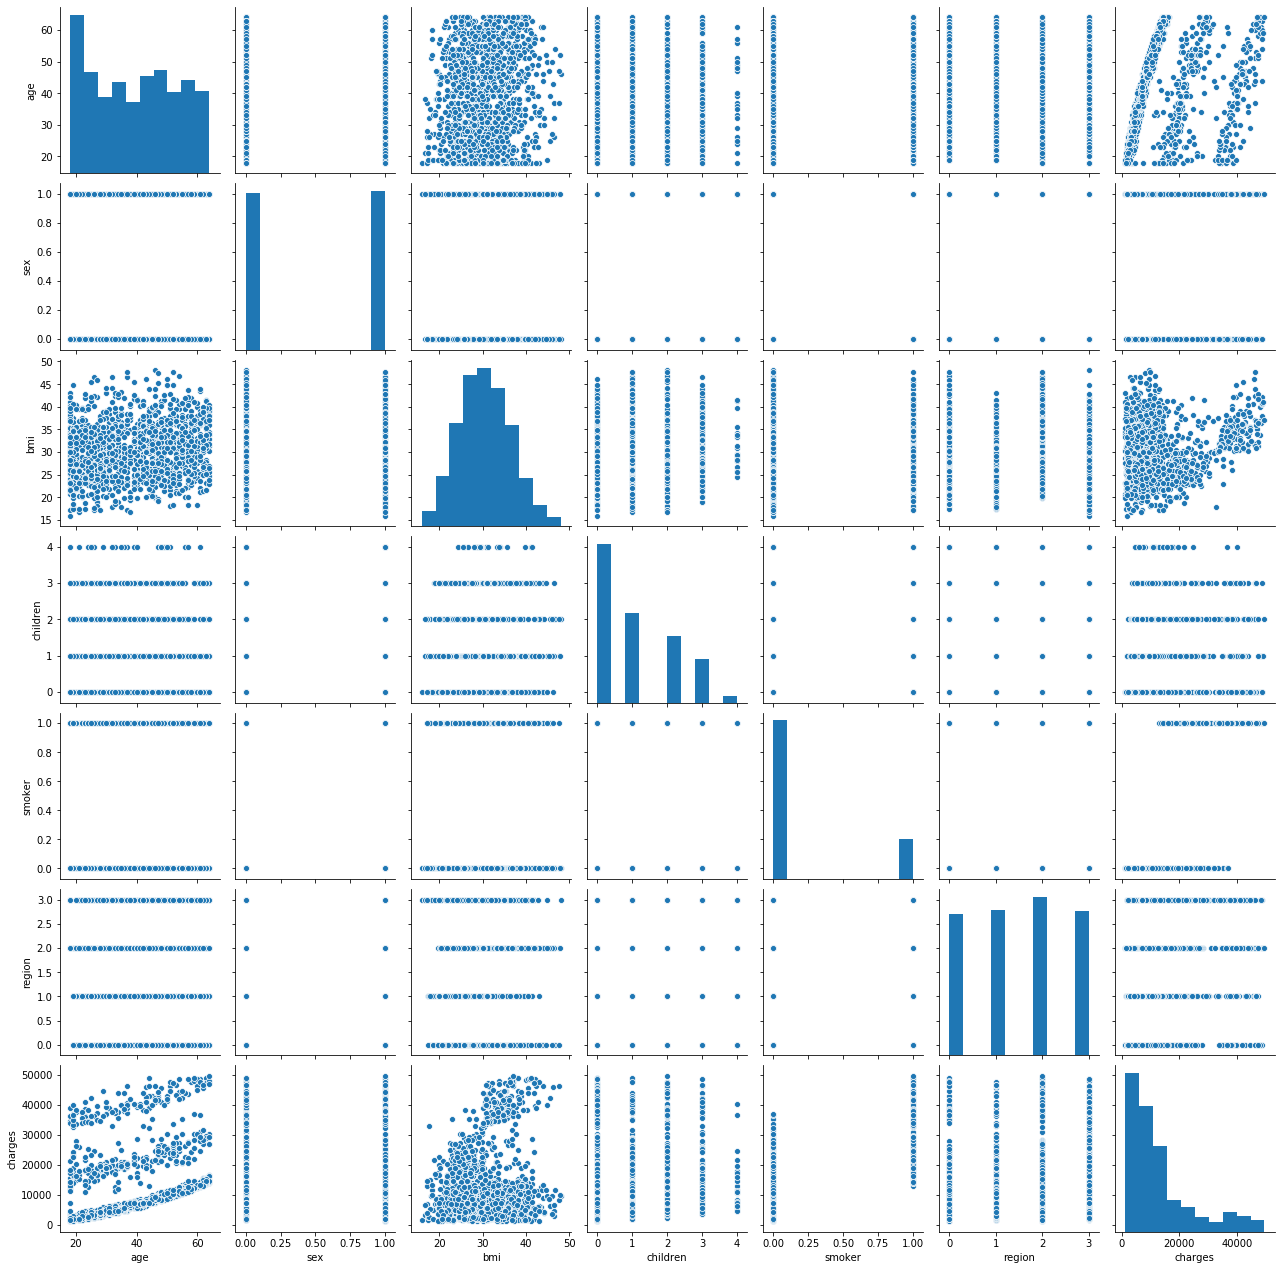

In [29]:
sns.pairplot(df)
plt.show()

By looking at the heatmap we cannot directly remove any variable but have to check the significance of the variables and only then can we decide whether to keep or remove the variable

Significance Testing of variables:

#H0:mu(sample)=mu(population)

#H1:mu(sample)!=mu(population)

#alpha=0.05

In [30]:
corr=df.corr()
corr.tail(1)

,age,sex,bmi,children,smoker,region,charges
charges,0.305263,0.059455,0.191453,0.100438,0.785129,0.055551,1.0


After looking at the correlations with the target variable we can see that smoker is highly correlated with the charges, but we shouldn't remove this feature before seeing the p-value and vif.

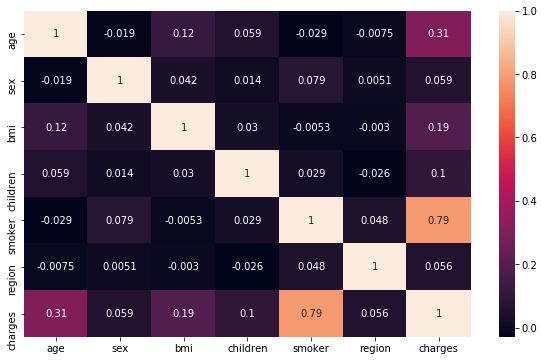

In [31]:
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)
plt.show()

Following are the observations from the Heatmap

The smoker and the charges are highly correlated
The age and the charges are highly correlated followed by BMI and no. of children

In [32]:
lst1=['age', 'bmi', 'children']
for col in lst1:
    pvalue=st.ttest_ind(df[col],df['charges'])[1]
    if pvalue<0.05:
        print(col)

age
bmi
children


All the three continuous variables are significant as their pvalues are smaller than 0.05

Now we check the significance of categorical variables

In [33]:
#sex
st.ttest_ind(df[df['sex']==0]['charges'],df[df['sex']==1]['charges'])[1]

0.031480485321147444

In [34]:
#smoker
st.ttest_ind(df[df['smoker']==0]['charges'],df[df['smoker']==1]['charges'])[1]

3.109489224087728e-274

In [35]:
#region
st.f_oneway(df[df['region']==0]['charges'],df[df['region']==1]['charges'],df[df['region']==2]['charges'],df[df['region']==3]['charges'])[1]

0.024392409326049868

From above analysis we see that only smoker variable is significant. this can also be observed from the displots plotted above as we see that the means of the categories in sex and region are almost coinciding

Thus, the significant variables are age,bmi,children and smoker

### 3 c.

After looking at the correlations with the target variable we can see that smoker is highly correlated with the charges, but we shouldn't remove this feature before seeing the p-value and vif.

In [36]:
X=df.drop('charges',axis=1)
y=df['charges']

In [37]:
X_constant = sm.add_constant(X)
olsmodel = sm.OLS(y,X_constant).fit()
olsmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     660.1
Date:                Wed, 04 Mar 2020   Prob (F-statistic):               0.00
Time:                        14:47:36   Log-Likelihood:                -13209.
No. Observations:                1309   AIC:                         2.643e+04
Df Residuals:                    1302   BIC:                         2.647e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.201e+04    962.092    -12.486      0.000   -1.39e+04   -1.01e+04
age          255.3740     11.595     22.024      0.000     232.626     278.122
sex         -115.3281    324.920     -0.355      0.723    -752.752     522.096
bmi          310.4751     27.306     11.370      0.000     256.907     364.043
children     577.7950    144.298      4.004      0.000     294.714     860.876
smoker      2.315e+04    404.612     57.205      0.000    2.24e+04    2.39e+04
region       229.9140    146.669      1.568      0.117     -57.820     517.648
==============================================================================
Omnibus:                      258.630   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              519.084
Skew:                           1.147   Prob(JB):                    1.92e-113
Kurtosis:                       5.062   Cond. No.                         306.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
#VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns).T

,age,sex,bmi,children,smoker,region
vif,1.018844,1.008802,1.016784,1.005842,1.010347,1.003074


As we can see that none of the features has multicollinearity i.e. vif is less than 2 for each features. And also from the p-values given above that only 'region' and 'sex' has p-values greater than 0.05 i.e. insignificant features. But looking at all the parameters we should go with all the features for building basic model, then we will increase the accuracy if it is less than desired.

#### 3.d

In [39]:
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(916, 6)
(393, 6)
(916,)
(393,)


For showing both train and test correct representative of the overall data statistically, we can use two-independent sample t-tests for mean.

In [40]:
#looking at only p-values
st.ttest_ind(X_train,X)[1]

array([0.70526808, 0.97773977, 0.72469762, 0.74696018, 0.54984067,
       0.57137045])

In [41]:
st.ttest_ind(X_test,X)[1]

array([0.50551705, 0.9611605 , 0.53607837, 0.57541837, 0.28771798,
       0.32022962])

In [42]:
st.ttest_ind(y_train,y)[1]

0.7282160950706476

In [43]:
st.ttest_ind(y_test,y)[1]

0.5363509516416219

As we can see that, the p-values for all the split is greater than 0.05 i.e. splitted data is correct representative of the whole data as our Null Hypothesis is failed to reject which states that the mean of the sample is equal to the mean of the population.

### Section C

### 3a.

In [44]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_trains=ss.fit_transform(X_train)
X_tests=ss.transform(X_test)

In [45]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
knn=KNeighborsRegressor()
rfr=RandomForestRegressor()

In [46]:
models=[]
models.append(('Linear Regression',lr))
models.append(('KNN Regression',knn))
models.append(('Random Forest Regressor',rfr))

In [47]:
results=[]
names=[]
for name,model in models:
    model.fit(X_trains,y_train)
    y_test_pred=model.predict(X_tests)
    kfold=KFold(shuffle=True,n_splits=3,random_state=0)
    cv_results=cross_val_score(model,X_trains,y_train,cv=kfold)
    results.append(np.sqrt(np.abs(cv_results)))
    names.append(name)
    print("%s: %f (%f)"%(name,np.mean(cv_results)*100
                         ,np.var(cv_results,ddof=1)))

Linear Regression: 76.144057 (0.000511)
KNN Regression: 81.822283 (0.000359)
Random Forest Regressor: 84.075876 (0.000062)


I'm fitting 3 base models because all these four models runs on different types of algorithms, based on which we can get the best fitted model which has higher accuracy than others. Here RandomForest Regressor is best.

In [48]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [49]:
y_pred = model.predict(X)
mae = mean_absolute_error(y,y_pred)
mse = mean_squared_error(y,y_pred)
print ("RMSE: ", np.sqrt(mse))
print ("MAPE: ", mae)

RMSE:  14187.946005780525
MAPE:  12270.106967740869


In [50]:
model = rfr.fit(X_train,y_train)
print(f'R^2 score for train: {rfr.score(X_train, y_train)}')
print(f'R^2 score for test: {rfr.score(X_test, y_test)}')

R^2 score for train: 0.9790727761512972
R^2 score for test: 0.8052952868104827


Here we can see that the model overfits, so we will optimize in next section.

### 3 .b

In [51]:
#VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns).T

,age,sex,bmi,children,smoker,region
vif,1.018844,1.008802,1.016784,1.005842,1.010347,1.003074


No multicollinerity exists.

### 3 c

**Hyperparameter tuning for RandomForest model using RandomizedSearchCV**

In [52]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
rfr=RandomForestRegressor(random_state=3)
params={
    'n_estimators':sp_randint(50,100),
    'max_depth':sp_randint(2,10),
    'min_samples_leaf':sp_randint(1,50),
    'min_samples_split':sp_randint(2,50),
    'max_features':sp_randint(0,8)
}
rsearch=RandomizedSearchCV(rfr,param_distributions=params,cv=3,n_iter=100
                           ,n_jobs=-1,random_state=3)
rsearch.fit(X,y)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [53]:
rsearch.best_params_

{'max_depth': 4,
 'max_features': 4,
 'min_samples_leaf': 2,
 'min_samples_split': 20,
 'n_estimators': 52}

In [56]:
y_pred = model.predict(X)
mae = mean_absolute_error(y,y_pred)
mse = mean_squared_error(y,y_pred)
print ("RMSE: ", np.sqrt(mse))
print ("MAPE: ", mae)

RMSE:  3061.8675144157655
MAPE:  1485.3741229677084


In [54]:
rfr=RandomForestRegressor(**rsearch.best_params_,random_state=3)
rfr.fit(X_train,y_train)
print(f'R^2 score for train: {rfr.score(X_train, y_train)}')
print(f'R^2 score for test: {rfr.score(X_test, y_test)}')

R^2 score for train: 0.878631640964867
R^2 score for test: 0.8378882446915082


Here we can now see that overfitting reduces after hyperparameter tunning to an acceptable range.

### 3 d.

In [57]:
olsmodel = sm.OLS(y,X_constant).fit()
olsmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     660.1
Date:                Wed, 04 Mar 2020   Prob (F-statistic):               0.00
Time:                        14:49:49   Log-Likelihood:                -13209.
No. Observations:                1309   AIC:                         2.643e+04
Df Residuals:                    1302   BIC:                         2.647e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.201e+04    962.092    -12.486      0.000   -1.39e+04   -1.01e+04
age          255.3740     11.595     22.024      0.000     232.626     278.122
sex         -115.3281    324.920     -0.355      0.723    -752.752     522.096
bmi          310.4751     27.306     11.370      0.000     256.907     364.043
children     577.7950    144.298      4.004      0.000     294.714     860.876
smoker      2.315e+04    404.612     57.205      0.000    2.24e+04    2.39e+04
region       229.9140    146.669      1.568      0.117     -57.820     517.648
==============================================================================
Omnibus:                      258.630   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              519.084
Skew:                           1.147   Prob(JB):                    1.92e-113
Kurtosis:                       5.062   Cond. No.                         306.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Age,Sex,No.of Childrens are affecting the target the most, as sex is inversly related to charges i.e. target but age, children,bmi is directly related to the trarget variables.